In [4]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn import metrics

warnings.filterwarnings("ignore")

no_of_tests = 900

dTree = DecisionTreeClassifier(criterion="gini")
rfc = RandomForestClassifier(n_estimators=100)

specific_range = range(0,no_of_tests)
df = pandas.read_csv("train.csv", skiprows = lambda x: x not in specific_range)
features = ['age', 'sex', 'chest_pain_type', 'resting_bps', 'cholesterol', 'fasting blood sugar']


X = df[features]
y = df[['target']]
dTree = dTree.fit(X, y)
rfc   =   rfc.fit(X,y)



In [11]:
specific_range_test = range(no_of_tests,1192)
df_test = pandas.read_csv("train.csv", skiprows = lambda x: x not in specific_range_test and x != 0)

test_arr = []
target_truth = []
for idx in range    (len(df_test)):
    test_arr.append([df_test.at[idx, 'age'],df_test.at[idx, 'sex'],df_test.at[idx, 'chest_pain_type'],df_test.at[idx, 'resting_bps'],df_test.at[idx, 'cholesterol'], df_test.at[idx, 'fasting blood sugar']])
    target_truth.append([df_test.at[idx, 'target']])
target_truth = np.array( [item for sublist in target_truth for item in sublist])
print(test_arr)
test_predicted_dtree = dTree.predict(test_arr)



#print("DTREE PREDICTION: ", dTree.predict([[49, 1, 3, 150, 291]]))
#print("RFC PREDICTION: ",  rfc.predict([[49, 1, 3, 150, 291]]))

[[56, 1, 3, 130, 256, 1], [44, 1, 2, 120, 263, 0], [52, 1, 3, 172, 199, 1], [57, 1, 3, 150, 168, 0], [48, 1, 2, 110, 229, 0], [54, 1, 4, 140, 239, 0], [48, 0, 3, 130, 275, 0], [49, 1, 2, 130, 266, 0], [64, 1, 1, 110, 211, 0], [58, 0, 1, 150, 283, 1], [58, 1, 2, 120, 284, 0], [58, 1, 3, 132, 224, 0], [60, 1, 4, 130, 206, 0], [50, 0, 3, 120, 219, 0], [58, 0, 3, 120, 340, 0], [66, 0, 1, 150, 226, 0], [43, 1, 4, 150, 247, 0], [40, 1, 4, 110, 167, 0], [69, 0, 1, 140, 239, 0], [60, 1, 4, 117, 230, 1], [64, 1, 3, 140, 335, 0], [59, 1, 4, 135, 234, 0], [44, 1, 3, 130, 233, 0], [42, 1, 4, 140, 226, 0], [43, 1, 4, 120, 177, 0], [57, 1, 4, 150, 276, 0], [55, 1, 4, 132, 353, 0], [61, 1, 3, 150, 243, 1], [65, 0, 4, 150, 225, 0], [40, 1, 1, 140, 199, 0], [71, 0, 2, 160, 302, 0], [59, 1, 3, 150, 212, 1], [61, 0, 4, 130, 330, 0], [58, 1, 3, 112, 230, 0], [51, 1, 3, 110, 175, 0], [50, 1, 4, 150, 243, 0], [65, 0, 3, 140, 417, 1], [53, 1, 3, 130, 197, 1], [41, 0, 2, 105, 198, 0], [65, 1, 4, 120, 177, 0],

Accuracy: 0.9759450171821306
Precision: 0.9922480620155039
Sensitivity: 0.9552238805970149
Specificity: 0.9936305732484076
F1 score: 0.973384030418251


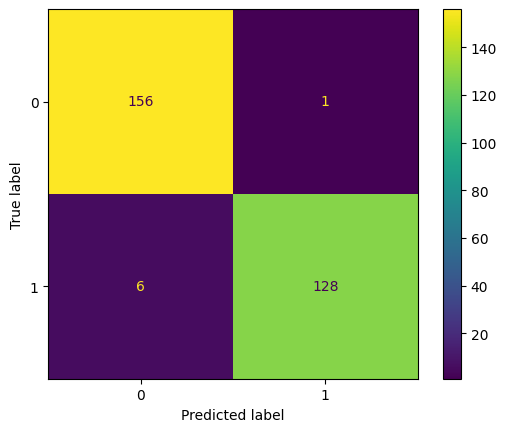

In [6]:
confusion_matrix = metrics.confusion_matrix(target_truth, test_predicted_dtree)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
Accuracy = metrics.accuracy_score(target_truth, test_predicted_dtree)
Precision = metrics.precision_score(target_truth, test_predicted_dtree)
Sensitivity_recall = metrics.recall_score(target_truth, test_predicted_dtree)
Specificity = metrics.recall_score(target_truth, test_predicted_dtree, pos_label=0)
F1_score = metrics.f1_score(target_truth, test_predicted_dtree)
print("Accuracy: {}\nPrecision: {}\nSensitivity: {}\nSpecificity: {}\nF1 score: {}".format(Accuracy, Precision, Sensitivity_recall, Specificity, F1_score))

cm_display.plot()
plt.show()

In [7]:
count_false_dtree = 0
for idx in range(len(test_arr)):
    #if np.array_equal(test_predicted_dtree[idx], target_truth[idx]):
    if test_predicted_dtree[idx] == target_truth[idx]:
        continue
    else:
        count_false_dtree +=1
        #print("Wrong prediction found at sample {}: {}\nTruth is {} while {} is predicted.\n\n".format(no_of_tests + idx, test_arr[idx], test_predicted_dtree[idx], target_truth[idx]))
print('Total false predictions: ', count_false_dtree, ' out of ', len(test_arr))

Total false predictions:  7  out of  291


In [8]:
test_predicted_rfc = rfc.predict(test_arr)
count_false_rfc = 0

for idx in range(len(test_arr)):
    if (test_predicted_rfc[idx] == target_truth[idx]).all():
        continue
    else:
        count_false_rfc+=1
        #print("Wrong prediction found at sample {}: {}\nTruth is {} while {} is predicted.\n\n".format(no_of_tests + idx, test_arr[idx], test_predicted_rfc[idx], target_truth[idx]))
print('Total false prediction: ', count_false_rfc)

Total false prediction:  9


Elapsed time to compute the importances: 0.010 seconds


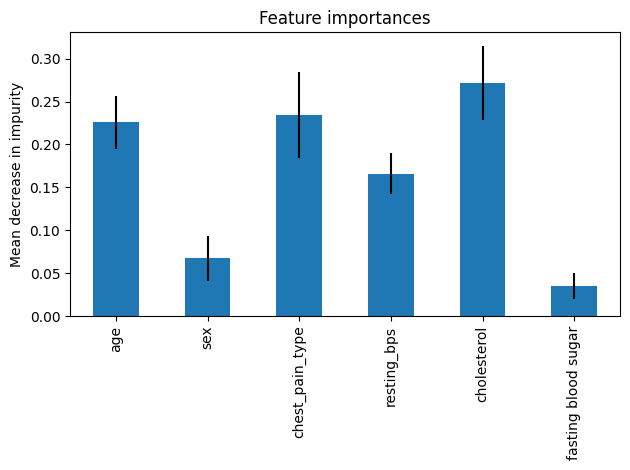

In [10]:
#tree.plot_tree(dTree, feature_names=features)
#plt.savefig("maxdepth10.png", dpi = 1000)
import pandas as pd

import time

import numpy as np

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()